# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [75]:
df = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv", sep='\t')

### Step 4. See the first 10 entries

In [76]:
df.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

Text(0.5, 1.0, 'Most number of items ordered')

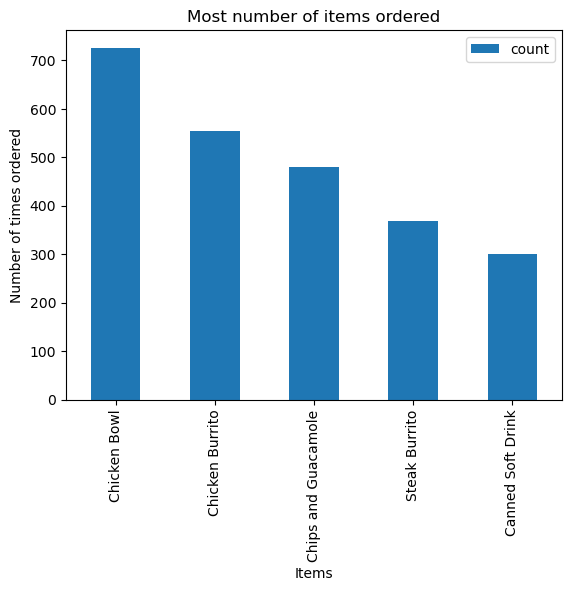

In [77]:
x = df['item_name']
letter_counts = Counter(x)
letter_counts

df2 = pd.DataFrame.from_dict(letter_counts, orient='index', columns=['count'])
df2 = df2.sort_values(by='count', ascending=False).head(5)
df2.plot(kind='bar')

plt.xlabel('Items')
plt.ylabel('Number of times ordered')
plt.title('Most number of items ordered')

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

Text(0.5, 1.0, 'Number of items orderered per order price')

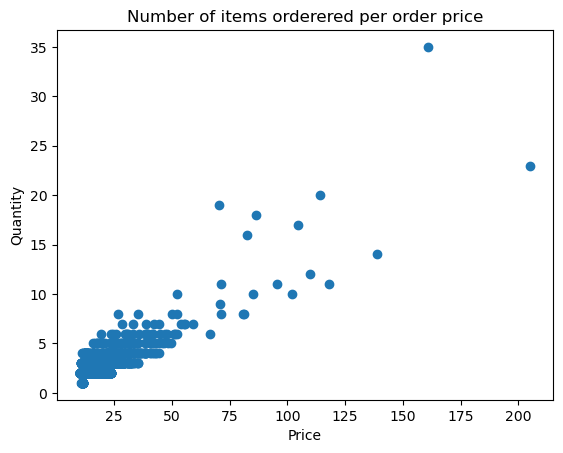

In [78]:
df['item_price'] = df['item_price'].apply(lambda x: float(x.replace("$", "")) if isinstance(x,str) else x)
orders_group = df.groupby('order_id').sum()
orders_group

plt.scatter(x=orders_group['item_price'], y=orders_group['quantity'])

plt.xlabel('Price')
plt.ylabel('Quantity')
plt.title('Number of items orderered per order price')